# Clean Data

### Imports

In [137]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Clean NFL Combine Data

In [138]:
combine_file = r'data\nfl_combine_1987_2020.csv'

df_raw_combine = pd.read_csv(combine_file)

df_raw_combine.head()

# Keep raw data import for reference - build copy to modify
df_combine = df_raw_combine

# Drop dummy '0' column and Wonderlic scores data
combine_cols_to_drop = ['Unnamed: 0', 'Wonderlic']
df_combine.drop(columns=combine_cols_to_drop, inplace=True)

# Clean column headers
df_combine.columns = df_combine.columns.str.lower()
df_combine.rename(columns={'college':'school'}, inplace=True)

# Clean school names
df_combine['school'] = df_combine['school'].str.strip()

# Drop years prior to 2000 (no draft data)
print(df_combine.shape)
df_combine.drop(df_combine[df_combine['year']<2000].index, inplace=True)
print('Cleaned combine size: ', df_combine.shape)
df_combine.head()

(12808, 15)
Cleaned combine size:  (8465, 15)


,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,60yd shuttle
4343,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,NaN
4344,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,12.47
4345,2000,Rashard Anderson,Jackson State (MS),CB,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,11.72
4346,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,11.87
4347,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,NaN


## Import position mapping data
The "combine" dataset maps players to very specific positions (ie, "Free Saftey" or "Outside Linebacker").

Map these granular positions to more standard positions. Also classify each position as "Offense" or "Defense", and indicate if the position is a "Skill" position or on the line of scrimmage.

In [139]:
df_positions = pd.read_csv('data/position_mapping.csv')
df_positions.head()

,pos,pos_group,offense_defense,line_or_skill
0,WR,WR,O,S
1,CB,CB,D,S
2,RB,RB,O,S
3,DE,DL,D,L
4,OT,OL,O,L


### Merge the draft and position mapping datasets

In [140]:
print(df_combine['pos'].value_counts())

df_combine = df_combine.merge(df_positions,
                          how='left',
                          on='pos')

print(df_combine['pos_group'].value_counts())

df_combine.head()

WR     1095
CB      864
RB      700
DE      657
DT      647
OT      618
OLB     586
OG      528
TE      471
QB      470
ILB     350
FS      347
SS      298
C       253
FB      175
P       108
K        92
LB       91
S        53
LS       22
EDG      22
OL       10
DL        4
DB        3
NT        1
Name: pos, dtype: int64
OL    1409
DL    1331
WR    1095
LB    1027
CB     864
S      701
RB     700
TE     471
QB     470
K      200
FB     175
SN      22
Name: pos_group, dtype: int64


,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,60yd shuttle,pos_group,offense_defense,line_or_skill
0,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,NaN,OL,O,L
1,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,12.47,TE,O,S
2,2000,Rashard Anderson,Jackson State (MS),CB,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,11.72,CB,D,S
3,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,11.87,LB,D,S
4,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,NaN,CB,D,S


#### Visualize combine performance distributions by position

['OL', 'TE', 'CB', 'LB', 'S', 'DL', 'QB', 'RB', 'WR', 'FB']
Unique Positions:  10
Index(['year', 'name', 'school', 'pos', 'height (in)', 'weight (lbs)',
       'hand size (in)', 'arm length (in)', '40 yard', 'bench press',
       'vert leap (in)', 'broad jump (in)', 'shuttle', '3cone', '60yd shuttle',
       'pos_group', 'offense_defense', 'line_or_skill'],
      dtype='object')


C:\Users\mitch\AppData\Local\Temp/ipykernel_26536/4152309854.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


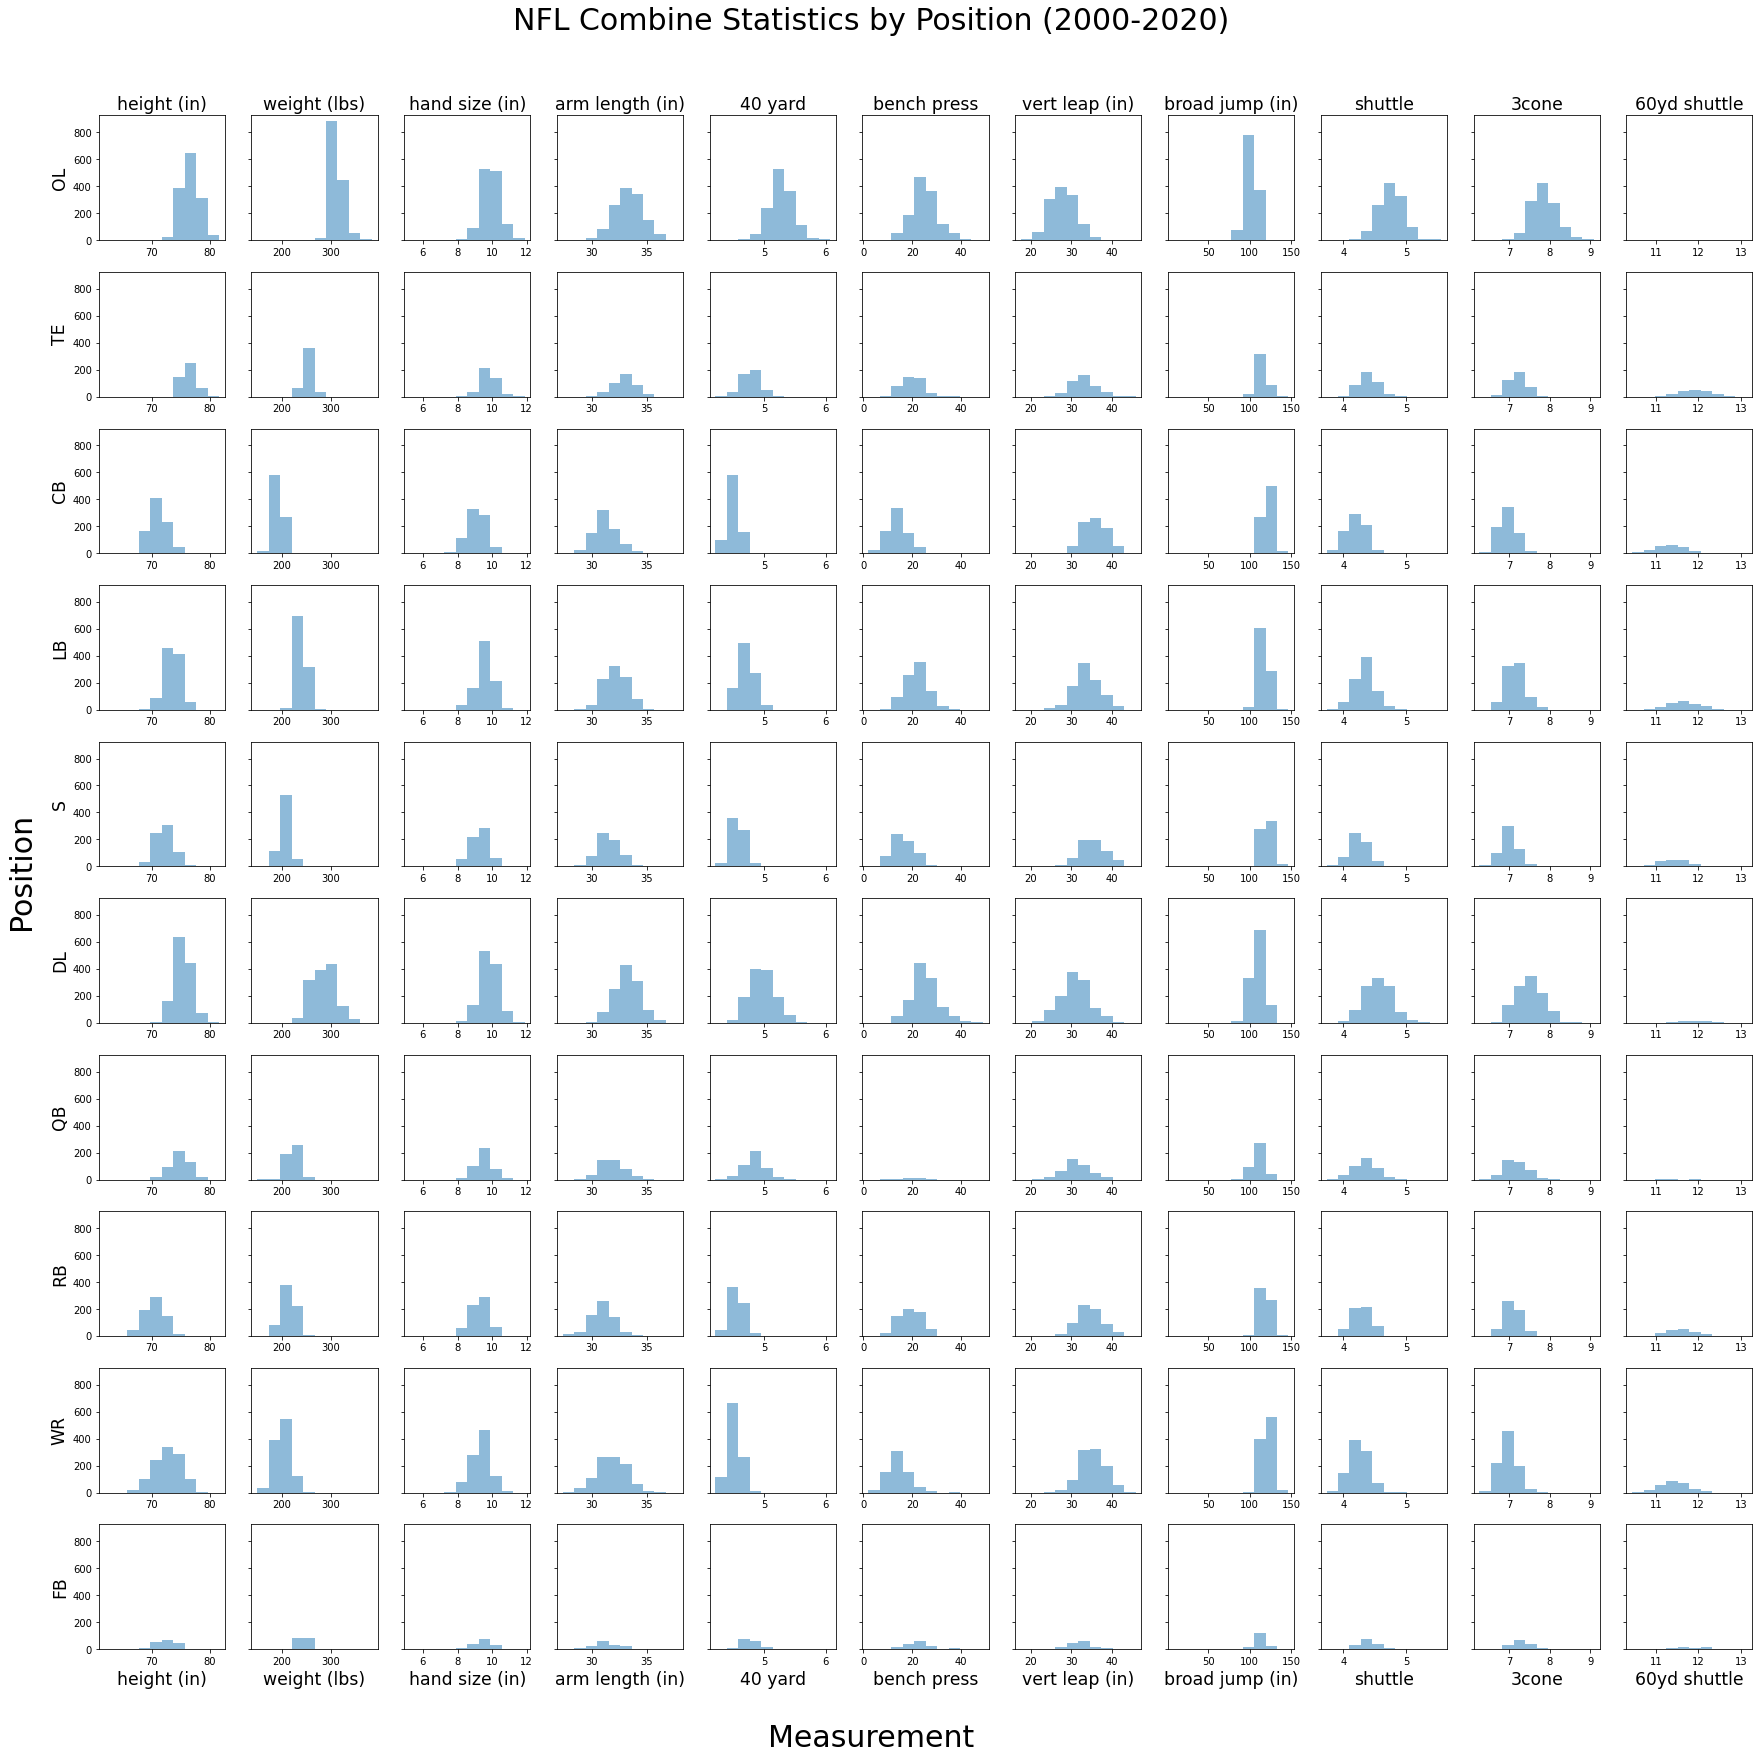

In [141]:
positions = df_combine['pos_group'].unique()

positions_to_drop = ['SN', 'K']   # Long snappers and kickers/punters

positions = [pos for pos in positions if pos not in positions_to_drop]
print(positions)


print('Unique Positions: ', len(positions))
print(df_combine.columns)
stat_columns = ['height (in)', 'weight (lbs)',
       'hand size (in)', 'arm length (in)', '40 yard', 'bench press',
       'vert leap (in)', 'broad jump (in)', 'shuttle', '3cone', '60yd shuttle']
num_stats = len(stat_columns)

fig, axes = plt.subplots(len(positions), num_stats,
                         sharex=False,
                         sharey=True,
                         figsize=(25,25))

fig.suptitle('NFL Combine Statistics by Position (2000-2020)', fontsize=30)
fig.supxlabel('Measurement', fontsize=30)
fig.supylabel('Position', fontsize=30)

fig.tight_layout(rect=[0.03, 0.03, 1, .95])

# Loop over axes and data
for row, pos in enumerate(positions):
    x_positions = df_combine[df_combine['pos_group']==pos]

    for col, stat in enumerate(stat_columns):
        # Get axis
        ax = axes[row,col]
        x = x_positions[stat]
        ax.hist(x,
                range=[df_combine[stat].min(),df_combine[stat].max()],
                alpha=.5, bins=10)
        # Set Y label once per row
        if col==0:
            ax.set_ylabel(pos, fontsize='xx-large')

        # Set X label once per column
        if row == 0:
            ax.set_title(stat, fontsize='xx-large')
        if row == len(positions) - 1:
            ax.set_xlabel(stat, fontsize='xx-large')

fig.show()
fig.savefig('images/stats_by_position.png', format='png')


## Clean NFL Draft Data

In [142]:
draft_file = r'data\espn_draft_history_2000_2021_cleaned.csv'
df_raw_draft = pd.read_csv(draft_file)

# Keep raw data import for reference - build copy to modify
df_draft = df_raw_draft

# Clean column headers
df_draft.columns = df_draft.columns.str.lower()

# Clean school names
df_draft['school'] = df_draft['school'].str.strip()

### Are there duplicated names?

In [143]:
df_combine['name'].value_counts(sort='descending').head(10)

Brandon Williams    5
Chris Brown         5
Brian Allen         4
Mike Williams       4
Chris Jones         4
Michael Bennett     3
Josh Harris         3
Travis Wilson       3
Steve Smith         3
Andre Smith         3
Name: name, dtype: int64

### Answer: Yes

So we cannot simply join the 2 datasets on player 'name' columns. Need to also join on
college and year.


## Do college names match in both datasets?

In [144]:
draft_school = pd.DataFrame(df_draft['school'].unique()).rename(columns={0:'school'})
draft_school['source'] = 'draft'
combine_school = pd.DataFrame(df_combine['school'].unique()).rename(columns={0:'school'})
combine_school['source'] = 'combine'
print(type(combine_school))
print(combine_school.head())

schools = draft_school.merge(combine_school, on='school', how='outer',
                             suffixes=['_draft', '_combine']).sort_values(by='school')

# List all cases with mismatches
na_mask = schools.isna().any(axis=1)
schools[na_mask].head(10)

<class 'pandas.core.frame.DataFrame'>
               school   source
0      Boston College  combine
1          Texas Tech  combine
2  Jackson State (MS)  combine
3      South Carolina  combine
4         Wake Forest  combine


,school,source_draft,source_combine
202,Abilene Christian,draft,NaN
381,Abilene Christian (TX),NaN,combine
445,Adams State (CO),NaN,combine
345,Alabama-Birmingham,NaN,combine
200,Albany,draft,NaN
388,Albany (NY),NaN,combine
412,Alcorn State (MS),NaN,combine
133,Appalachian State,draft,NaN
336,Appalachian State (NC),NaN,combine
255,Ashland,draft,NaN


### So we see that the 'combine' dataset frequently has the state appended to the school name;
Ex: "Abilene Christian (TX)". Remove these from school names, with the exception of "Miami (OH).

In [145]:
df_combine['school'] = df_combine['school'].str.replace('Miami (OH)', 'Miami - OH')

print(df_combine['school'].head())
regex_replace_parens = r'\([^)]*[a-zA-Z][^)]*\)'
df_combine['school'] = df_combine['school'].str.replace(regex_replace_parens, '', regex=True)

df_combine['school'].head()

0        Boston College
1            Texas Tech
2    Jackson State (MS)
3        South Carolina
4           Wake Forest
Name: school, dtype: object


C:\Users\mitch\AppData\Local\Temp/ipykernel_26536/4029171560.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['school'] = df_combine['school'].str.replace('Miami (OH)', 'Miami - OH')


0    Boston College
1        Texas Tech
2    Jackson State 
3    South Carolina
4       Wake Forest
Name: school, dtype: object

## Standardize player names between datasets
Player names in the "Draft" dataset include suffixes including "Jr., II, III, IV", but these are NOT included in the "combine" dataset.

Standardize player names between datasets by removing these values from the "Draft" dataset.

In [146]:
regex_suffixes_to_remove = r'Jr\.$|III$|IIII$|IV$|, Jr.$'
df_draft['name'] = df_draft['name'].str.replace(regex_suffixes_to_remove, '', regex=True)

# df_draft['name'].to_clipboard()

Merge the Draft and NFL Combine datasets

In [147]:
df_merged = df_combine.merge(df_draft, how='left',
                             on=['name', 'school', 'year'])

df_merged.head(10)

df_merged.to_clipboard()

## Investigate merged data

In [148]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8464
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8465 non-null   int64  
 1   name             8465 non-null   object 
 2   school           8462 non-null   object 
 3   pos              8465 non-null   object 
 4   height (in)      8465 non-null   float64
 5   weight (lbs)     8465 non-null   int64  
 6   hand size (in)   7639 non-null   float64
 7   arm length (in)  7638 non-null   float64
 8   40 yard          7922 non-null   float64
 9   bench press      6603 non-null   float64
 10  vert leap (in)   7503 non-null   float64
 11  broad jump (in)  7400 non-null   float64
 12  shuttle          6929 non-null   float64
 13  3cone            6827 non-null   float64
 14  60yd shuttle     1370 non-null   float64
 15  pos_group        8465 non-null   object 
 16  offense_defense  8465 non-null   object 
 17  line_or_skill 

## Data Cleaning:
* Very few 60-yard shuttle records; drop column
* Overwrite blank "Round" column values with '8' (will indicate undrafted)
* Drop kickers, long snappers, QBs and Fullbacks (too few, draft status not driven by stats)

In [149]:
# Drop 60yd shuttle
try:
    df_merged.drop(columns=['60yd shuttle'], inplace=True)
except:
    pass

# overwite blank 'round' values with '8' (will indicate undrafted)
df_merged['round'].fillna(8, inplace=True)

merged_cols_to_drop = ['year', 'name', 'school', 'pos',
                       'pk(ovr)', 'team', 'position']

try:
    df_merged.drop(columns=merged_cols_to_drop, inplace=True)
except:
    pass

positions_to_drop = ['SN', 'K', 'QB', 'FB']
positions_mask = \
    df_merged[df_merged['pos_group'].isin(positions_to_drop)].index

print(positions_mask)

print(df_merged.shape)
df_merged.drop(positions_mask, inplace=True)
print(df_merged)


# How many players don't have much combine data? Drop them
metrics_cols = ['height (in)', 'weight (lbs)', 'hand size (in)', 'arm length (in)',
       '40 yard', 'bench press', 'vert leap (in)', 'broad jump (in)',
       'shuttle', '3cone']

# See count of records by number of missing metrics values
# 10 total metrics values, drop if they don't have at least 8
print(df_merged[metrics_cols].isna().sum(axis=1).value_counts())
df_merged.dropna(axis=0, thresh=7,
                 subset=metrics_cols, inplace=True)

print(df_merged[metrics_cols].isna().sum(axis=1).value_counts())

df_merged.head(10)

Int64Index([  17,   23,   25,   27,   32,   63,   67,   77,   78,   91,
            ...
            8341, 8362, 8364, 8383, 8402, 8405, 8416, 8432, 8434, 8458],
           dtype='int64', length=867)
(8465, 14)
      height (in)  weight (lbs)  hand size (in)  arm length (in)  40 yard  \
0           76.00           334           10.50            34.00     5.58   
1           74.50           253            9.88            31.00     5.01   
2           74.40           206           10.00            33.00     4.59   
3           72.40           237            9.75            31.88     4.76   
4           69.40           175            8.50            30.00     4.46   
...           ...           ...             ...              ...      ...   
8460        76.63           258           10.50            34.13     4.73   
8461        76.00           257            9.75            33.13     4.92   
8462        73.75           230            9.25            31.63     4.79   
8463        76.88   

,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,pos_group,offense_defense,line_or_skill,round
0,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,OL,O,L,6.0
1,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,TE,O,S,8.0
2,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,CB,D,S,8.0
3,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,LB,D,S,8.0
4,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,CB,D,S,4.0
5,77.9,312,9.25,32.75,5.36,20.0,28.0,96.0,4.73,7.72,OL,O,L,7.0
6,71.6,208,9.50,32.00,4.63,10.0,35.0,114.0,4.32,6.92,S,D,S,7.0
7,69.9,199,10.00,31.13,4.48,16.0,37.5,116.0,4.04,6.81,CB,D,S,4.0
8,73.0,192,NaN,NaN,4.43,NaN,38.5,124.0,3.99,6.70,CB,D,S,2.0
10,71.0,178,NaN,NaN,4.50,NaN,34.5,122.0,4.20,6.87,CB,D,S,5.0


In [150]:
df_merged.columns

Index(['height (in)', 'weight (lbs)', 'hand size (in)', 'arm length (in)',
       '40 yard', 'bench press', 'vert leap (in)', 'broad jump (in)',
       'shuttle', '3cone', 'pos_group', 'offense_defense', 'line_or_skill',
       'round'],
      dtype='object')

## Begin Modeling


### Imports for modeling

In [151]:
from sklearn.model_selection import train_test_split

# encoders
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

#pipeline
from sklearn.pipeline import make_pipeline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosted Models
# Use this one if you have an M1 chip.
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Permutation Importance
from sklearn.inspection import permutation_importance

# for displaying images and html
from IPython.display import Image
from IPython.core.display import HTML



### Split data

In [152]:
target = 'round'
X = df_merged.drop(columns=target)
y = df_merged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

print(f'X_train shape: {X_train.shape} X_test shape: {X_test.shape}')

X_train shape: (5511, 13) X_test shape: (1378, 13)


## Baseline Accuracy

In [153]:
baseline = y.value_counts(normalize=True).max()
baseline


0.5619102917694876

## Build Random Forest Model/Pipeline

In [154]:
# very similar to RandomForest
model_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['pos_group', 'offense_defense',
                                      'line_or_skill'],
                                mapping=[{'col': 'pos_group',
                                          'data_type': dtype('O'),
                                          'mapping': CB     1
LB     2
S      3
OL     4
DL     5
TE     6
WR     7
RB     8
NaN   -2
dtype: int64},
                                         {'col': 'offense_defense',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
O      2
NaN   -2
dtype: int64},
                                         {'col': 'line_or_skill',
                                          'data_type': dtype('O'),
                                          'mapping': S      1
L      2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
     

### Evaluate Random Forest Model/Pipeline

In [155]:
print('Random Forest Training Accuracy', model_rf.score(X_train, y_train))
print('Random Forest Validation Accuracy', model_rf.score(X_test, y_test))
X_train

Random Forest Training Accuracy 1.0
Random Forest Validation Accuracy 0.5413642960812772


,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,pos_group,offense_defense,line_or_skill
1235,69.30,194,8.50,30.880,4.63,8.0,31.0,112.0,NaN,NaN,CB,D,S
6685,72.25,230,9.63,32.250,4.68,NaN,35.5,117.0,4.38,7.35,LB,D,S
5050,69.38,216,9.38,30.375,4.67,15.0,31.0,115.0,4.55,7.37,S,D,S
6780,75.50,291,9.38,33.625,4.89,23.0,32.0,116.0,4.59,7.57,OL,O,L
7338,71.50,204,8.38,32.125,4.42,25.0,35.0,121.0,4.39,7.21,S,D,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,74.38,223,9.88,32.380,4.63,13.0,32.0,121.0,4.50,7.15,RB,O,S
6400,73.63,240,9.75,31.750,4.79,18.0,29.5,114.0,4.87,6.79,LB,D,S
6442,75.25,306,10.63,33.250,5.27,22.0,24.5,100.0,4.81,7.97,OL,O,L
6640,71.75,232,10.00,32.000,4.78,18.0,33.0,116.0,4.21,7.30,LB,D,S


### Get Permutation importances for model

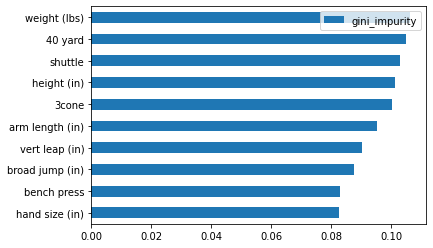

In [156]:
importances = model_rf.named_steps['randomforestclassifier'].feature_importances_

gini_imp = pd.DataFrame(data=importances, index=X_test.columns, columns=['gini_impurity']).sort_values(by='gini_impurity')

gini_imp.tail(10).plot(kind='barh');



## Build XGBoost Model/Pipeline

In [157]:
model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(
        loss='deviance',
        # learning_rate=0.1,
        n_estimators=1_000,
        subsample=1,
        max_depth=6,
        random_state=42
    )
)

model_xgb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['pos_group', 'offense_defense',
                                      'line_or_skill'],
                                mapping=[{'col': 'pos_group',
                                          'data_type': dtype('O'),
                                          'mapping': CB     1
LB     2
S      3
OL     4
DL     5
TE     6
WR     7
RB     8
NaN   -2
dtype: int64},
                                         {'col': 'offense_defense',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
O      2
NaN   -2
dtype: int64},
                                         {'col': 'line_or_skill',
                                          'data_type': dtype('O'),
                                          'mapping': S      1
L      2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier',
 

### Evaluate XGBoost Model/Pipeline

In [158]:
print('XGBoost Forest Training Accuracy', model_xgb.score(X_train, y_train))
print('XGBoost Forest Validation Accuracy', model_xgb.score(X_test, y_test))

XGBoost Forest Training Accuracy 1.0
XGBoost Forest Validation Accuracy 0.5297532656023222
